In [130]:

#Idea: Prediction of groundwater levels: I came across a research paper titled 
#"Groundwater Prediction Using Machine-Learning Tools" (https://www.mdpi.com/1999-4893/13/11/300) 
#and thought of comparing results from regression analysis, SVM and random forests to predict the 
#groundwater levels in India. I use values of precipitation (pr), altitude (alt), 
#average annual temperature (at) and distance from sea (dsea) to predict the groundwater levels.  

#Progress: Managed to run basic GLM and SVM models - I need to undersand the math better to improve them.


In [131]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

def clear_dataframe():
    return pd.DataFrame()

In [132]:
#Converting the dta files from American Economic Association Journal's Appendix (paper titled "Wells, Water, and Welfare: The Impact of Access to Groundwater on Rural Poverty and Conflict")

iac = pd.io.stata.read_stata(r'C:\Users\vishe\Downloads\113902-V1\Data-and-Read-Me\AEJ_IAC.dta')
iac.to_csv(r'C:\Users\vishe\Downloads\113902-V1\Data-and-Read-Me\AEJ_IAC.csv')

In [133]:

def aquifer_depth_str(dmaq2, dmaq3):
    if dmaq3 == 1:
        return 'high'
    elif dmaq2 == 1:
        return 'medium'
    else:
        return 'low'

# Create a new column 'aquifer_depth_str'
iac['aquifer_depth_str'] = iac.apply(lambda row: aquifer_depth_str(row['dmaq2'], row['dmaq3']), axis=1)

def aquifer_depth(dmaq2, dmaq3):
    if dmaq3 == 1:
        return 3
    elif dmaq2 == 1:
        return 2
    else:
        return 1

# Create a new column 'aquifer_depth'
iac['aquifer_depth'] = iac.apply(lambda row: aquifer_depth(row['dmaq2'], row['dmaq3']), axis=1)

columns_to_concat = ['alt', 'dsea', 'at', 'pr', 'aquifer_depth_str', 'aquifer_depth']
iac = pd.concat([iac[columns_to_concat]], axis=1)


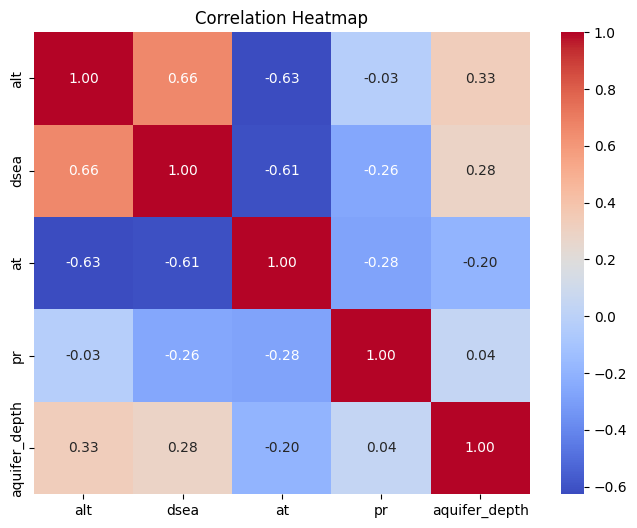

In [134]:
#Understanding the data

columns_analyse=['alt', 'dsea', 'at', 'pr', 'aquifer_depth']

iac_analyse=iac[columns_analyse]

#correlation
correlation = iac_analyse.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\vishe\AppData\Local\Temp\ipykernel_31992\645751621.py:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\vishe\AppData\Local\Temp\ipykernel_31992\645751621.py:13: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\vishe\AppData\Local\Temp\ipykernel_31992\645751621.py:18: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\vishe\AppData\Local\Temp\ipykernel_31992\645751621.py:23: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



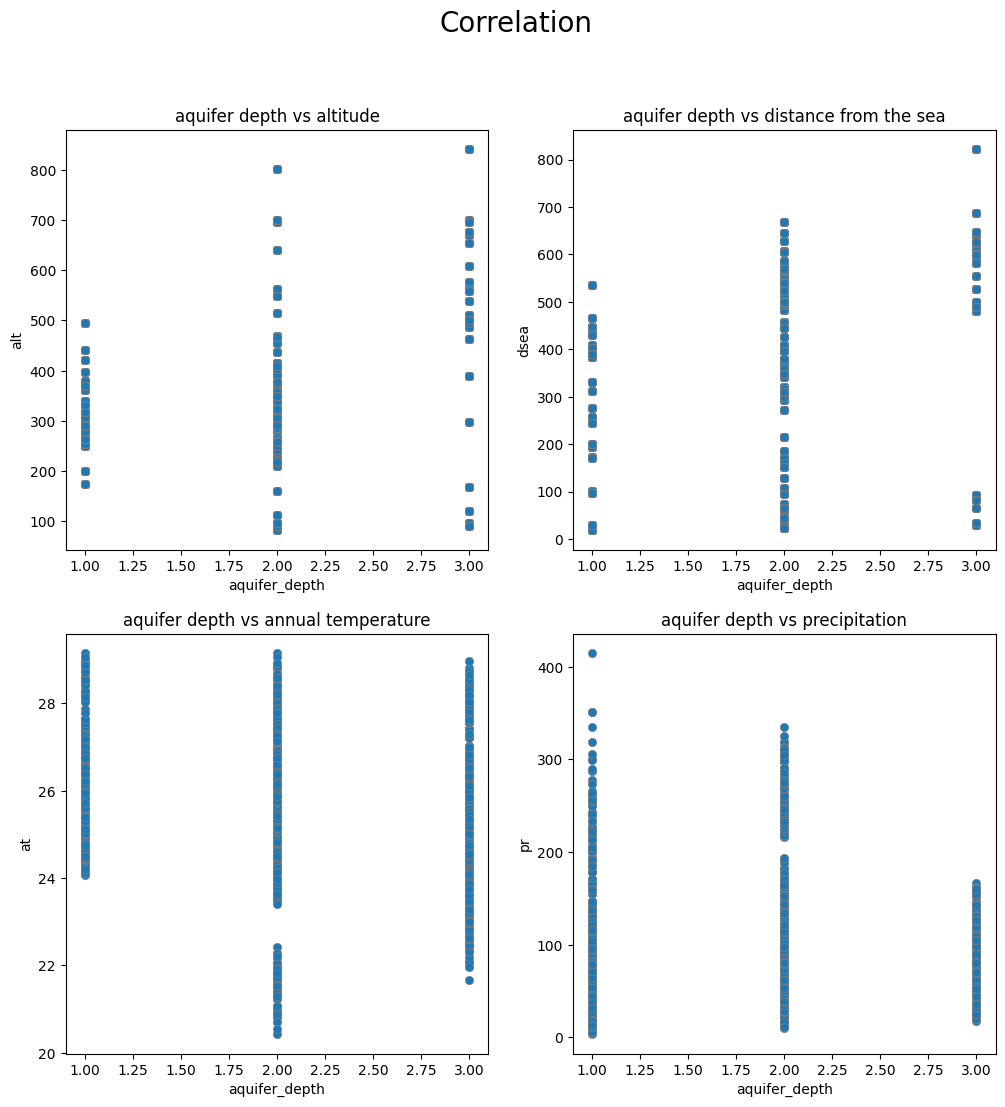

In [135]:
palette ={0 : 'blue', 1 : 'green'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = iac['aquifer_depth'], y = iac['alt'], 
                    data = iac, palette = palette, edgecolor=edgecolor)
plt.title('aquifer depth vs altitude')

plt.subplot(222)
ax2 = sns.scatterplot(x = iac['aquifer_depth'], y = iac['dsea'], 
                    data = iac, palette =palette, edgecolor=edgecolor)
plt.title('aquifer depth vs distance from the sea')

plt.subplot(223)
ax3 = sns.scatterplot(x = iac['aquifer_depth'], y = iac['at'], 
                    data = iac, palette =palette, edgecolor=edgecolor)
plt.title('aquifer depth vs annual temperature')

plt.subplot(224)
ax4 = sns.scatterplot(x = iac['aquifer_depth'], y = iac['pr'], 
                    data = iac, palette =palette, edgecolor=edgecolor)
plt.title('aquifer depth vs precipitation')

fig.suptitle('Correlation', fontsize = 20)
plt.savefig('1')
plt.show()

In [136]:
iac.head

<bound method NDFrame.head of       alt       dsea         at          pr aquifer_depth_str  aquifer_depth
0     168  29.100000  27.790001  102.660004              high              3
1     168  29.100000  28.059999   76.370003              high              3
2     168  29.100000  28.420000   91.559998              high              3
3     168  29.100000  28.090000   87.480003              high              3
4     168  29.100000  28.129999   69.320000              high              3
...   ...        ...        ...         ...               ...            ...
3963  200  96.800003  25.950001  114.419998               low              1
3964  200  96.800003  25.940001  145.750000               low              1
3965  200  96.800003  26.389999   95.639999               low              1
3966  200  96.800003  26.219999  121.589996               low              1
3967  200  96.800003  26.750000  116.029999               low              1

[3968 rows x 6 columns]>

In [ ]:
#Method 1: SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X = iac[['alt','dsea', 'at', 'pr']]  
y = iac['aquifer_depth_str']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)


svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)


print("accuarcy score is : ", accuracy_score(y_test, y_pred))


X_train shape: (2777, 4)
y_train shape: (2777,)
X_test shape: (1191, 4)
y_test shape: (1191,)


In [ ]:
#Method 2: Generalised Linear Model

"""
Need to work on this further - check the dataset for missing values



model = smf.glm(formula = "aquifer_depth ~ alt + dsea + at + pr", 
                data = iac, 
                family = sm.families.Binomial())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

"""
